# **TWITTER CLIMATE CHANGE SENTIMENT ANALYSIS**



PROJECT TEAM MEMBERS
1. Eric Cheruiyot
2. Geoffery Ongeri
3. Antonia Mulinge

# **Table of contents**


*   Introduction
*   Modelling by use of Neural Network
*   Optimizing
*   Challenging the Solution using a different Model
*   Validation
*   Conclusion and Recommendation.

# **INTRODUCTION**

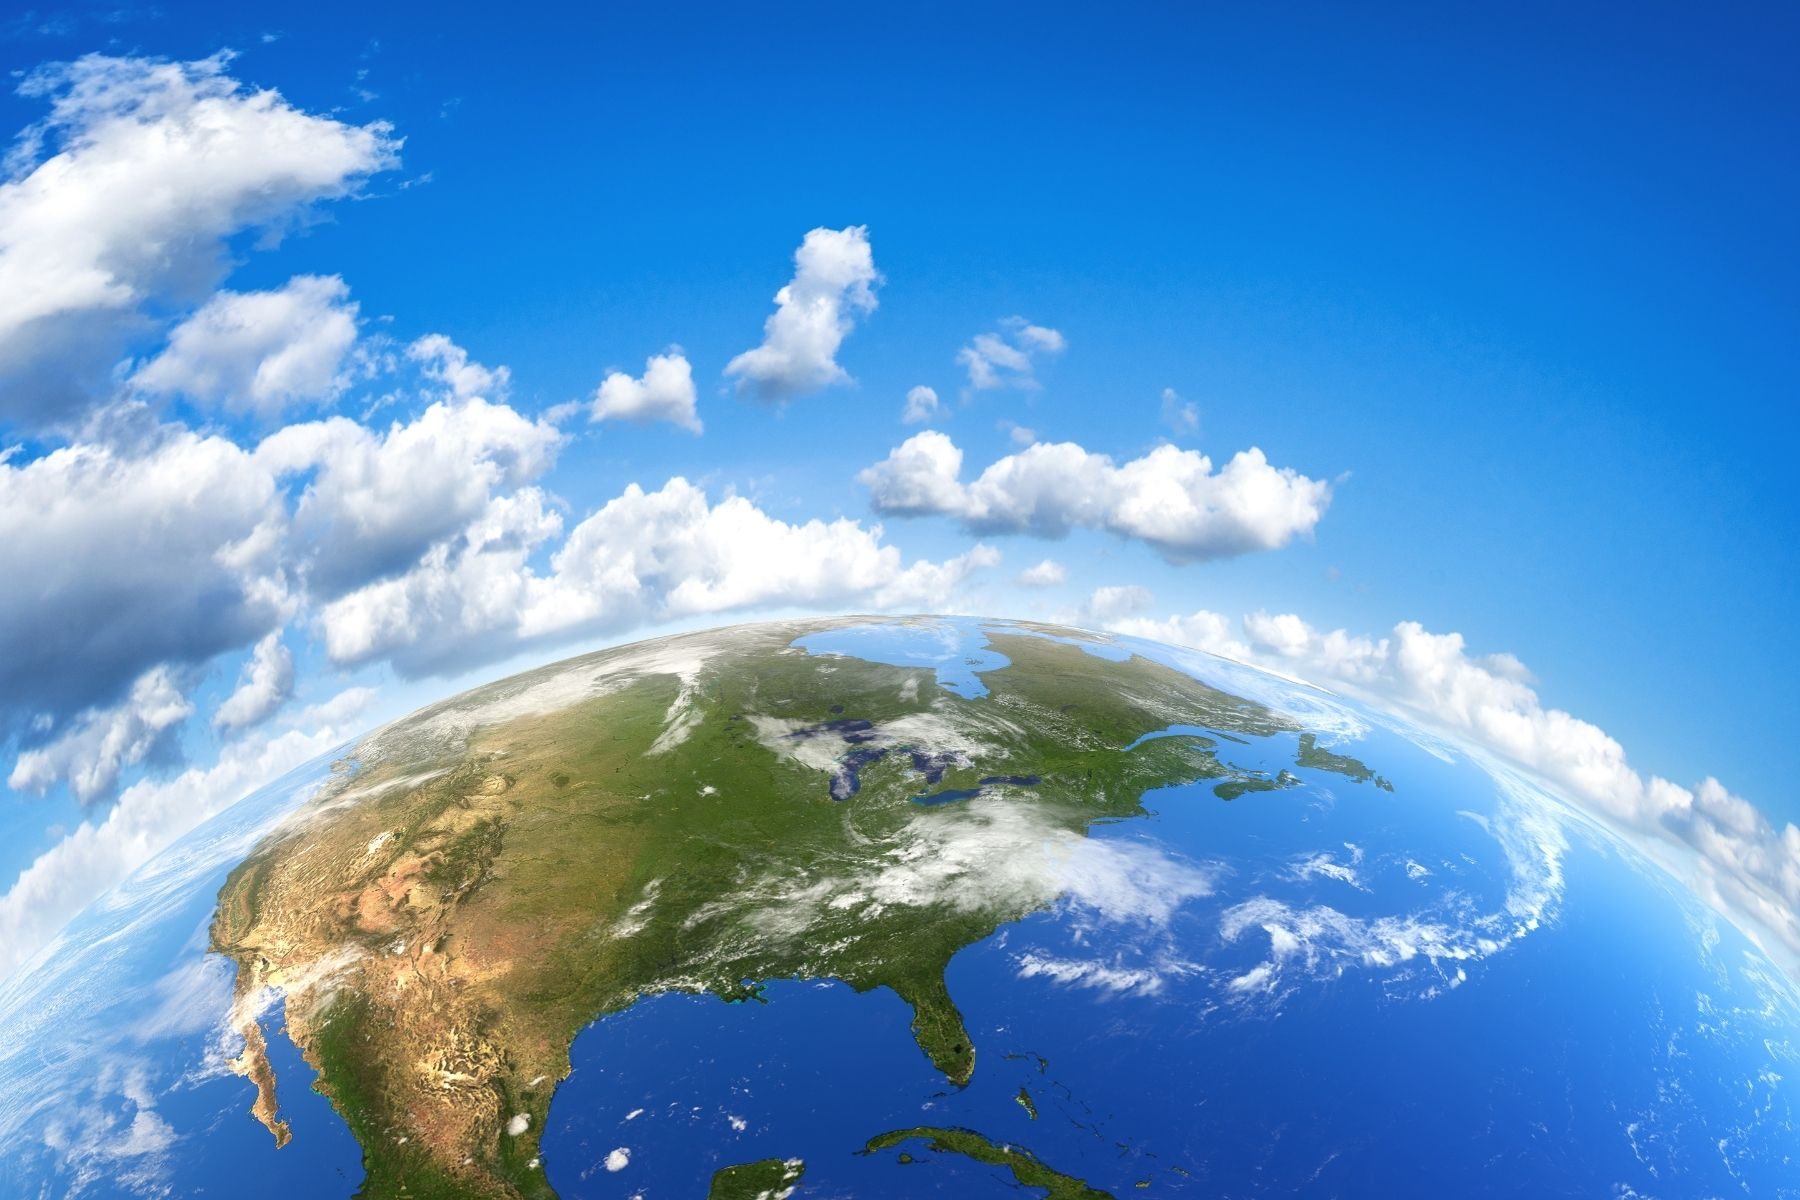

A changing climate is leading to more occurrences of extreme events such as droughts (moisture deficits) and floods (moisture surpluses), which have a negative impact on crop growth and yields. Plants require an optimum soil-water-air environment in the root zone to maintain physiological response to growth, photosynthetic functions, and productive vegetative capacity for high yield response.

Rising air temperatures also have a deleterious effect on crop production, as heat stress limits the optimum productive capability of our current commercial plant species on which the population depends for food security.

A changing climate is also affecting other aspects of crop production such as increased pests and disease in some situations, changes and even losses in biodiversity in some environments, and major disruptions due to extreme storm events, such as the recent decimation by Hurricane Maria of Puerto Rico’s agricultural crops, livestock, and associated infrastructure.

**Problem Statement**

Twitter being one of the most influential ways of passing information and analysing trends on various issues and in our case climate change, we chose to analyse tweets data to predict whether a tweet is pro-climate change, anti-climate change , from a news segment or just a neutral part with not take in climate change issues.

**Metric for success**

Implementing a model that can accurately predict whether a tweet lies in the following categories of sentiments:

1. Pro
2. Anti
3. News
4. Neutral

These categories are all in relation to climate change.

**Context**

The dataset in its entirity is an extract from twitter and involves the message of climate change. In recent times there has been alot of talk aroud climate change and preseving our climate.

**Data Relevance**

The collection of this data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo.

This dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43943 tweets were annotated. Each tweet is labelled independently by 3 reviewers. This dataset only contains tweets that all 3 reviewers agreed on (the rest were discarded).

**Data Source**: [Kaggle](https://www.kaggle.com/datasets/edqian/twitter-climate-change-sentiment-dataset)
, [Kaggle](https://www.kaggle.com/datasets/fullmetal26/glovetwitter27b100dtxt)


**DataSet description**

Each tweet is labelled as one of the following classes:

2(News): the tweet links to factual news about climate change
1(Pro): the tweet supports the belief of man-made climate change
0(Neutral): the tweet neither supports nor refutes the belief of man-made climate change
1(Anti): the tweet does not believe in man-made climate change


# **ANALYSING DATA TO UNDERSTAND**


Importing data manipulation libraries

In [348]:
#Importing data manipulation libraries
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
import keras
from keras.utils.data_utils import pad_sequences
from keras.models import Model
from keras.layers import Input, Embedding,SpatialDropout1D, Bidirectional, GRU
from keras.layers import Conv1D, GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate, Dense, Dropout
from keras.preprocessing import text, sequence
from keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
from sklearn.model_selection import train_test_split
from keras_preprocessing.sequence import pad_sequences
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [349]:
#Loading and previewing the data
data = pd.read_csv('/content/twitter_sentiment_data.csv')
# remove any empty tweets
data = data.dropna(subset=['message']) 

In [350]:
data

,sentiment,message,tweetid
0,-1,@tiniebeany climate change is an interesting h...,792927353886371840
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256
3,1,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153
...,...,...,...
43938,1,"Dear @realDonaldTrump,\nYeah right. Human Medi...",791307031919550464
43939,1,What will your respective parties do to preven...,791316857403936768
43940,2,RT @MikkiL: UN Poll Shows Climate Change Is th...,791357509101621249
43941,0,RT @taehbeingextra: i still can$q$t believe th...,791390042136641537


In [351]:
import re
import numpy as np
from nltk.corpus import stopwords 

# clean up given string
def clean_text(message): 
    #Lowercase
    message = message.lower()   
    # Remove link
    message = re.sub(r'http\S+', '', message)
    # Remove unexpected artifacts
                            
    message = re.sub(r'http\S+|www\.\S+|https\S+', '', message, flags=re.MULTILINE) #Removing the hyperlink/urls
    message = re.sub(r'â€¦', '', message)
    message = re.sub(r'…', '', message)
    message = re.sub(r'htt', '', message)
    message = re.sub(r'po', '', message)
    message = re.sub(r'â€™', "'", message)
    message = re.sub(r'â€˜', "'", message)
    message = re.sub(r'\$q\$', "'", message)
    message = re.sub(r'&amp;', "and", message)
    message = re.sub(r'\@\w+|\#','', message)     # removing @mentions and #
    message = re.sub(r'RT[\s]+', '', message)           # removing RT
    message = re.sub(r'&[a-z;]+', '', message)          # removing '>'
    message = re.sub('[^a-zA-Z]', ' ', message)         #removing punctuation
    # remove non valid characters
    message = re.sub('[^A-Za-z0-9#@ ]+', "", message)
    words = message.split()  

    stops = set(stopwords.words("english"))
    words = [w for w in words if not w in stops]
    return( " ".join(words))

In [352]:
# cleaning the message text data
data['message'] = data['message'].apply(clean_text)

In [353]:
data.head()

,sentiment,message,tweetid
0,-1,climate change interesting hustle global warmi...,792927353886371840
1,1,rt watch beforetheflood right travels world ta...,793124211518832641
2,1,fabulous leonardo dicaprio film climate change...,793124402388832256
3,1,rt watched amazing documentary leonardodicapri...,793124635873275904
4,2,rt pranita biswasi lutheran odisha gives testi...,793125156185137153


In [354]:
# create onehot representation of the label
def get_onehot(arr, num_class):
    return np.eye(num_class)[np.array(arr).reshape(-1)]

In [355]:
data

,sentiment,message,tweetid
0,-1,climate change interesting hustle global warmi...,792927353886371840
1,1,rt watch beforetheflood right travels world ta...,793124211518832641
2,1,fabulous leonardo dicaprio film climate change...,793124402388832256
3,1,rt watched amazing documentary leonardodicapri...,793124635873275904
4,2,rt pranita biswasi lutheran odisha gives testi...,793125156185137153
...,...,...,...
43938,1,dear yeah right human mediated climate change ...,791307031919550464
43939,1,respective parties prevent climate change glob...,791316857403936768
43940,2,rt un shows climate change lowest global concerns,791357509101621249
43941,0,rt still believe gif taehyung saved human race...,791390042136641537


In [356]:
# remove duplicates from data
data = data.drop_duplicates(subset=['message'])

In [357]:
# isolate label and text
y = data['sentiment']
y += 1
X_data = data['message']

In [358]:
# splitting into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size= 0.1, random_state = 1)

In [359]:
# Setup model parameters
EMBEDDING_FILE = "glove.twitter.27B.200d.txt" # path to embedding file 
max_features = 20000                           # we are only interested in top 50k most frequently used words
maxlen = 150                                   # tweets longer than 150 words will be truncated otherwise padded
embed_size = 200                               # size of each vector (must match the size of the glove embedding)


In [360]:
# tokenize training and testing data
tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train))
X_tr = tokenizer.texts_to_sequences(X_train)
X_tr = keras.utils.data_utils.pad_sequences(X_tr, maxlen=maxlen)
X_ts = tokenizer.texts_to_sequences(X_test)
X_ts = keras.utils.data_utils.pad_sequences(X_ts, maxlen=maxlen)

In [361]:
# loading the embedding file (may take some time)
embeddings_index = {}
with open(EMBEDDING_FILE,encoding='utf8') as f:
  for line in f:
    values = line.rstrip().rsplit(' ')
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs

word_index = tokenizer.word_index

In [362]:
# prepare embedding matrix
num_words = min(max_features, len(word_index) + 1)
embedding_matrix = np.zeros((num_words, embed_size))
for word, i in word_index.items():
  if i >= max_features:
    continue
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    # words not found in embedding index will be all-zeros.
    embedding_matrix[i] = embedding_vector
  
y_tr_one = get_onehot(y_train, 4)
y_ts_one = get_onehot(y_test, 4) 

In [363]:
# creating the model
gru_input = Input(shape=(maxlen, ))
x = Embedding(max_features, embed_size, weights=[embedding_matrix],trainable = False)(gru_input)
x = SpatialDropout1D(0.2)(x)
x = Bidirectional(GRU(128, return_sequences=True, reset_after=True, recurrent_activation='sigmoid'))(x)
avg_pool = GlobalAveragePooling1D()(x)
max_pool = GlobalMaxPooling1D()(x)
x = concatenate([avg_pool, max_pool]) 
x = Dense(128, activation='relu')(x)
x = Dropout(0.1)(x)
gru_output = Dense(4, activation="sigmoid")(x)
gru_model = Model(gru_input, gru_output)
gru_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [364]:
# training parameters
epochs = 20 
batch_size = 128
patience = 4    # for early stopping
file_path="weights/gru_final.hdf5" # where to save the best model weights

In [365]:
# creating checkpoint to save the model
checkpoint = ModelCheckpoint(file_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
early = EarlyStopping(monitor="val_loss", mode="min", patience=6)
callbacks_list = [checkpoint, early] #early

In [366]:
# training the model
gru_model.fit(X_tr, y_tr_one, batch_size=batch_size, epochs=epochs, validation_split=0.1, callbacks=callbacks_list)

Epoch 1/20
243/243 [==============================] - ETA: 0s - loss: 0.9858 - accuracy: 0.5941
Epoch 1: val_loss improved from inf to 0.86724, saving model to weights/gru_final.hdf5
243/243 [==============================] - 276s 1s/step - loss: 0.9858 - accuracy: 0.5941 - val_loss: 0.8672 - val_accuracy: 0.6394
Epoch 2/20
243/243 [==============================] - ETA: 0s - loss: 0.8526 - accuracy: 0.6537
Epoch 2: val_loss improved from 0.86724 to 0.84057, saving model to weights/gru_final.hdf5
243/243 [==============================] - 267s 1s/step - loss: 0.8526 - accuracy: 0.6537 - val_loss: 0.8406 - val_accuracy: 0.6513
Epoch 3/20
243/243 [==============================] - ETA: 0s - loss: 0.7918 - accuracy: 0.6791
Epoch 3: val_loss improved from 0.84057 to 0.80839, saving model to weights/gru_final.hdf5
243/243 [==============================] - 264s 1s/step - loss: 0.7918 - accuracy: 0.6791 - val_loss: 0.8084 - val_accuracy: 0.6696
Epoch 4/20
243/243 [===========================

In [367]:
# loading the best weights
gru_model.load_weights(file_path)

In [368]:
# predicting on testing set
class_prob = gru_model.predict(X_ts)
class_pred = np.argmax(class_prob,axis=1)

120/120 [==============================] - 17s 137ms/step


In [ ]:
# some basic metrics for accuracy
print('accuracy score: ' + str(accuracy_score(y_test,class_pred)))
classes = ['Anti','Neutral','Pro','News']

In [ ]:
# ploting the confusion matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,class_pred)
cm = cm/cm.astype(np.float).sum(axis=1)

df_cm = pd.DataFrame(cm, index = classes, columns = classes)
sn.heatmap(df_cm, annot=True,cmap='Blues', fmt='g')

In [369]:
from sklearn.metrics import classification_report
print(classification_report(y_test, class_pred))

              precision    recall  f1-score   support

           0       0.61      0.50      0.55       391
           1       0.53      0.45      0.49       688
           2       0.74      0.78      0.76      1976
           3       0.67      0.72      0.69       779

    accuracy                           0.68      3834
   macro avg       0.64      0.61      0.62      3834
weighted avg       0.68      0.68      0.68      3834

